In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BanditArm:
  def __init__(self, m):
    self.m = m
    self.m_estimate = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.m_estimate = (1 - 1.0/self.N)*self.m_estimate + 1.0/self.N*x

In [7]:
m1, m2, m3 = 1.5, 2.5, 3.5
N = 100000
eps = 0.1

bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]

# count number of suboptimal choices
means = np.array([m1, m2, m3])
true_best = np.argmax(means)
count_suboptimal = 0

data = np.empty(N)

for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
          j = np.random.choice(len(bandits))
    else:
          j = np.argmax([b.m_estimate for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    if j != true_best:
      count_suboptimal += 1

    # for the plot
    data[i] = x
    
cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

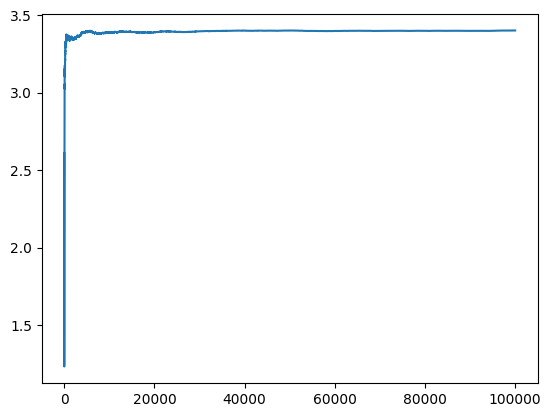

In [8]:
plt.plot(cumulative_average)

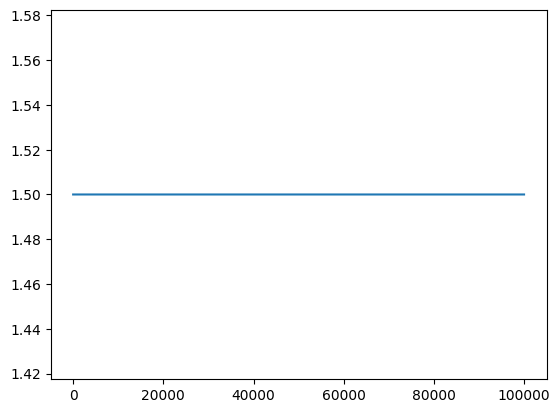

In [9]:
plt.plot(np.ones(N)*m1)

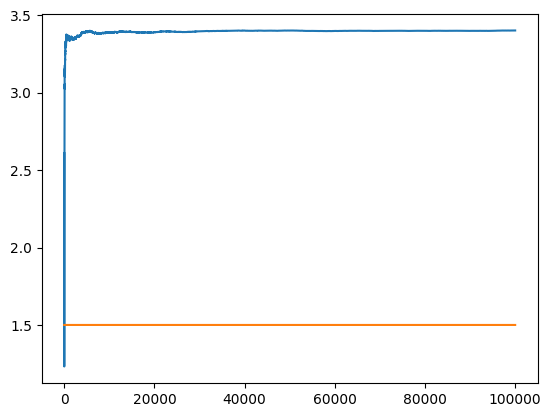

In [10]:
plt.plot(cumulative_average)
plt.plot(np.ones(N)*m1)

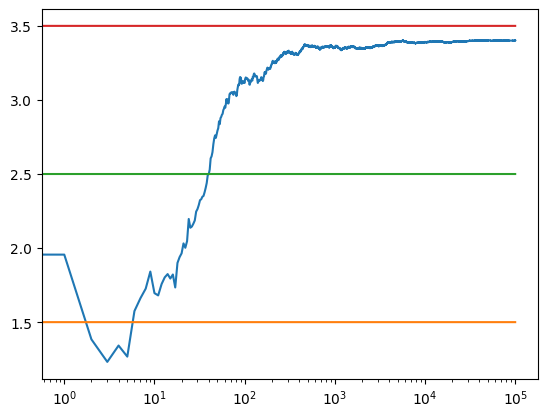

In [19]:
# plot moving average ctr
plt.plot(cumulative_average)
plt.plot(np.ones(N)*m1)
plt.plot(np.ones(N)*m2)
plt.plot(np.ones(N)*m3)
plt.xscale('log')
plt.show()

In [22]:
help(plt.xscale)

Help on function xscale in module matplotlib.pyplot:

xscale(value: 'str | ScaleBase', **kwargs) -> 'None'
    Set the xaxis' scale.

    Parameters
    ----------
    value : {"linear", "log", "symlog", "logit", ...} or `.ScaleBase`
        The axis scale type to apply.

    **kwargs
        Different keyword arguments are accepted, depending on the scale.
        See the respective class keyword arguments:

        - `matplotlib.scale.LinearScale`
        - `matplotlib.scale.LogScale`
        - `matplotlib.scale.SymmetricalLogScale`
        - `matplotlib.scale.LogitScale`
        - `matplotlib.scale.FuncScale`
        - `matplotlib.scale.AsinhScale`

    Notes
    -----

    .. note::

        This is the :ref:`pyplot wrapper <pyplot_interface>` for `.axes.Axes.set_xscale`.

    By default, Matplotlib supports the above-mentioned scales.
    Additionally, custom scales may be registered using
    `matplotlib.scale.register_scale`. These scales can then also
    be used here.



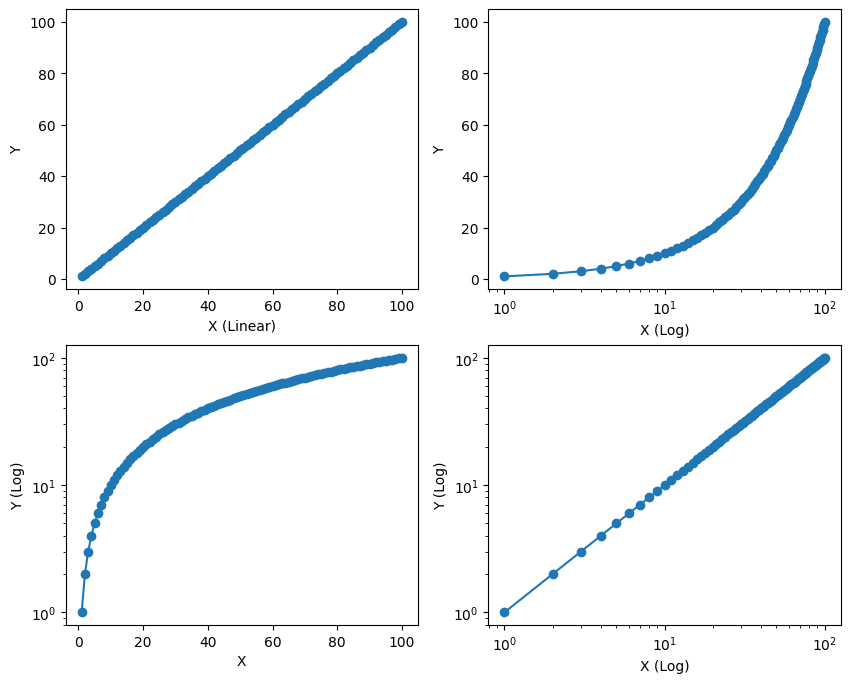

In [41]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 101)  # 1 to 100
y = x  # Exponential growth

plt.figure(figsize=(10, 8))

# Linear Scale
plt.subplot(2, 2, 1)
plt.plot(x, y, marker='o')
plt.xlabel("X (Linear)")
plt.ylabel("Y")

# Logarithmic Scale
plt.subplot(2, 2, 2)
plt.plot(x, y, marker='o')
plt.xscale("log")  # Apply log scale to X-axis
plt.xlabel("X (Log)")
plt.ylabel("Y")

# Logarithmic Scale
plt.subplot(2, 2, 3)
plt.plot(x, y, marker='o')
plt.yscale("log")  # Apply log scale to Y-axis
plt.xlabel("X")
plt.ylabel("Y (Log)")

# Logarithmic Scale
plt.subplot(2, 2, 4)
plt.plot(x, y, marker='o')
plt.xscale("log")  # Apply log scale to X-axis
plt.yscale("log")  # Apply log scale to Y-axis
plt.xlabel("X (Log)")
plt.ylabel("Y (Log)")

plt.show()

In [44]:
N=10
1.0/N

0.1

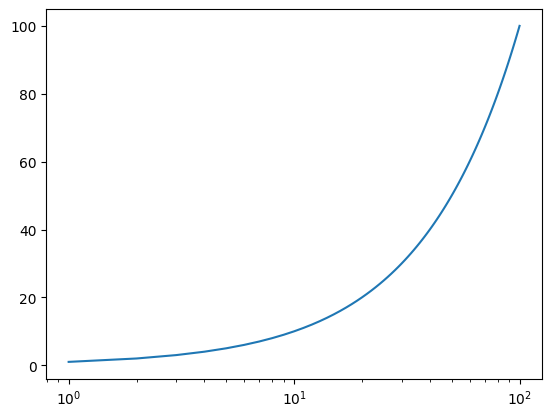

In [50]:
plt.plot(x,y)
plt.xscale('log')
plt.show()

In [52]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]

  # count number of suboptimal choices
  means = np.array([m1, m2, m3])
  true_best = np.argmax(means)
  count_suboptimal = 0

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(len(bandits))
    else:
      j = np.argmax([b.m_estimate for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    if j != true_best:
      count_suboptimal += 1

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.m_estimate)

  print("percent suboptimal for epsilon = %s:" % eps, float(count_suboptimal) / N)

  return cumulative_average # return for comparing later

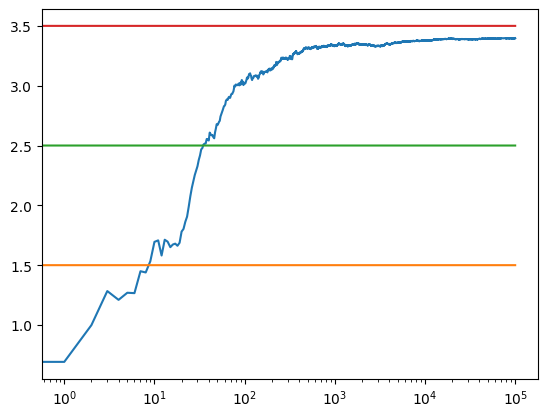

1.5116340188263362
2.499242118669803
3.4982652307379287
percent suboptimal for epsilon = 0.1: 0.06816


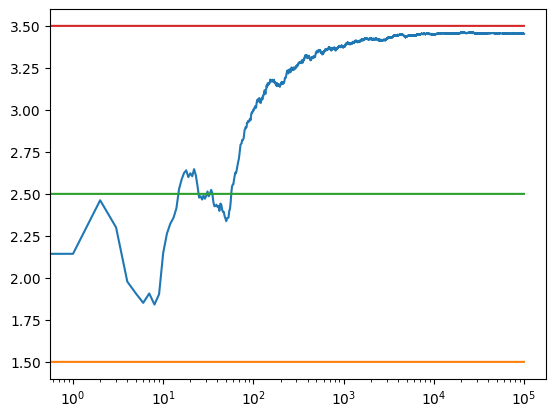

1.4731717486315854
2.4967264778960407
3.504837101830147
percent suboptimal for epsilon = 0.05: 0.03389


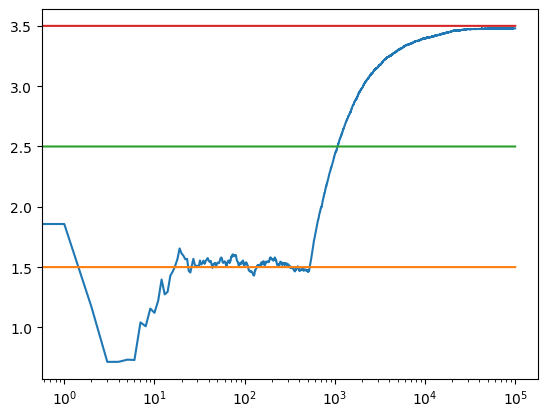

1.51906752269711
2.5389031215386
3.5001844761161243
percent suboptimal for epsilon = 0.01: 0.01217


In [53]:
m1, m2, m3 = 1.5, 2.5, 3.5
c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
c_01 = run_experiment(m1, m2, m3, 0.01, 100000)

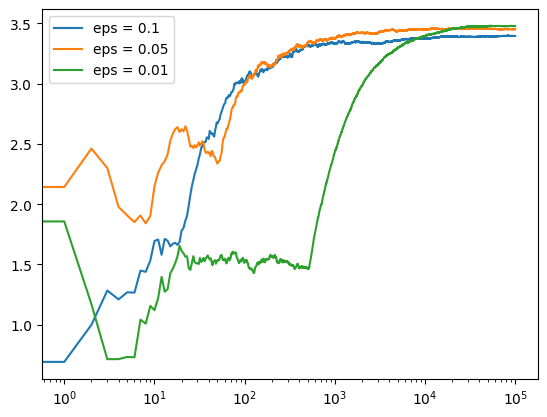

In [55]:
# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

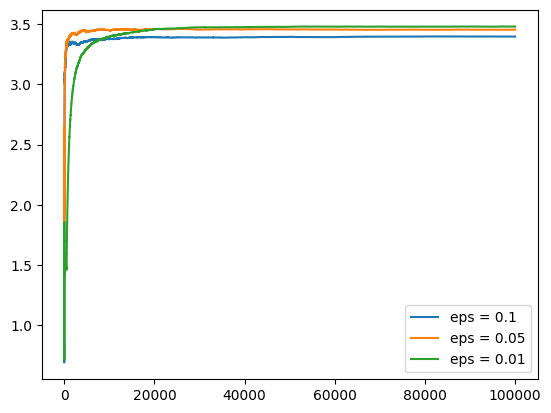

In [56]:
  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()

## Observation:
* smaller epsilon converges slower.
* larger epsilon makes final cummulative reward lower.